# Imports

In [1]:
from fitting.Fitter import create_fitter_from_configuration
from models.model_creation import create_model_from_parameter_combination
from utils.configuration_parser.gridsearch_configuration import get_gridsearch_configuration
from utils.pickle_utils import save_gridsearch_result
from utils.visualization_helpers import load_noisy_and_target_image, plot_image_grid

# Configuration

In [2]:
gridsearch_configuration = get_gridsearch_configuration()

gridsearch_configuration.noisy_image_path = 'data/raw_images/diagonal_noisy.png'
gridsearch_configuration.target_image_path = 'data/raw_images/diagonal_target.png'

gridsearch_configuration.model_types = ['deep', 'conv']
gridsearch_configuration.input_shapes = [[12, 12], [10,10], [8,8], [6,6], [4,4], [2,2]]
gridsearch_configuration.numbers_of_hidden_channels = [32, 64, 128, 256]
gridsearch_configuration.numbers_of_layers = [4, 6, 8]
gridsearch_configuration.number_of_runs = 5

gridsearch_configuration.log_frequency = 10
print(gridsearch_configuration)

number of GPUs:  1
noisy_image_path: data/raw_images/diagonal_noisy.png  
target_image_path: data/raw_images/diagonal_target.png  
result_path: data/results/2020-11-09-13:42-gridsearch.pkl  
image_shape: (256, 256, 3)  
model_types: ['deep', 'conv']  
input_shapes: [[12, 12], [10, 10], [8, 8], [6, 6], [4, 4], [2, 2]]  
numbers_of_layers: [4, 6, 8]  
numbers_of_hidden_channels: [32, 64, 128, 256]  
number_of_runs: 5  
number_of_iterations: 30000  
learning_rate: 0.1  
convergence_check_length: 100  
log_frequency: 10  
find_best: True  
parameter_combinations: []  
data_type: <class 'torch.cuda.FloatTensor'>  



In [3]:
parameter_combinations = gridsearch_configuration.generate_parameter_combinations()
# for parameters in parameter_combinations:
#     print(parameters)

# Load Images and Initialize Fitter

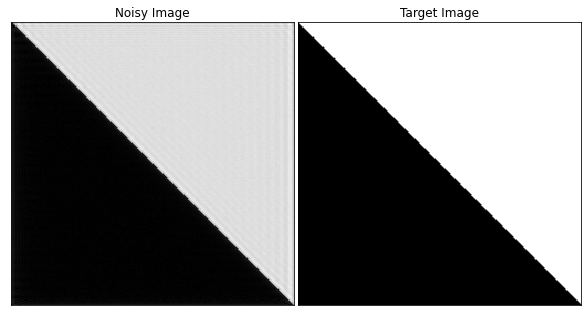

In [4]:
noisy_image, target_image = load_noisy_and_target_image(gridsearch_configuration)
fitter = create_fitter_from_configuration(gridsearch_configuration)

plot = plot_image_grid([noisy_image, target_image], ['Noisy Image', 'Target Image'], nrows=1)

In [ ]:
 for parameter_combination in parameter_combinations:
        print("+++" + str(parameter_combination) + "+++")
        model = create_model_from_parameter_combination(parameter_combination, gridsearch_configuration.image_shape)
        fitter(model, noisy_image, target_image)
        result = fitter.get_result()
        save_gridsearch_result(result, gridsearch_configuration.result_path)
        print('')

+++('deep', [12, 12], 4, 32)+++


/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:2494: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


Step: 00920, Loss: 0.001092, Target Loss: 0.008590, Minimum Loss at: 828 with 0.0010000
Adam has converged at step 929.

+++('deep', [12, 12], 4, 64)+++
Step: 00440, Loss: 0.001112, Target Loss: 0.010263, Minimum Loss at: 347 with 0.0010550
Adam has converged at step 449.

+++('deep', [12, 12], 4, 128)+++
Step: 00240, Loss: 0.009760, Target Loss: 0.000791, Minimum Loss at: 149 with 0.0030860
Adam has converged at step 250.

+++('deep', [12, 12], 4, 256)+++
Step: 00630, Loss: 0.009974, Target Loss: 0.000457, Minimum Loss at: 533 with 0.0099340
Adam has converged at step 634.

+++('deep', [12, 12], 6, 32)+++
Step: 00540, Loss: 0.000994, Target Loss: 0.009518, Minimum Loss at: 439 with 0.0009690
Adam has converged at step 541.

+++('deep', [12, 12], 6, 64)+++
Step: 00690, Loss: 0.001294, Target Loss: 0.008669, Minimum Loss at: 590 with 0.0009590
Adam has converged at step 691.

+++('deep', [12, 12], 6, 128)+++
Step: 00180, Loss: 0.009220, Target Loss: 0.001332, Minimum Loss at: 84 with 0.


+++('deep', [4, 4], 6, 128)+++
Step: 00190, Loss: 0.010717, Target Loss: 0.002226, Minimum Loss at: 98 with 0.01027200
Adam has converged at step 199.

+++('deep', [4, 4], 6, 256)+++
Step: 00400, Loss: 0.010546, Target Loss: 0.001447, Minimum Loss at: 300 with 0.0102100
Adam has converged at step 401.

+++('deep', [4, 4], 8, 32)+++
Step: 00610, Loss: 0.001381, Target Loss: 0.009366, Minimum Loss at: 509 with 0.0012190
Adam has converged at step 611.

+++('deep', [4, 4], 8, 64)+++
Step: 01050, Loss: 0.001300, Target Loss: 0.009172, Minimum Loss at: 952 with 0.0012520
Adam has converged at step 1053.

+++('deep', [4, 4], 8, 128)+++
Step: 00290, Loss: 0.010624, Target Loss: 0.001671, Minimum Loss at: 197 with 0.0086180
Adam has converged at step 298.

+++('deep', [4, 4], 8, 256)+++
Step: 00240, Loss: 0.013419, Target Loss: 0.003696, Minimum Loss at: 100 with 0.0111990
Adam has converged at step 245.

+++('deep', [2, 2], 4, 32)+++
Step: 00380, Loss: 0.015466, Target Loss: 0.029249, Minimu

Step: 00530, Loss: 0.013789, Target Loss: 0.028188, Minimum Loss at: 430 with 0.0134130
Adam has converged at step 531.

+++('conv', [6, 6], 4, 32)+++
Step: 00670, Loss: 0.024110, Target Loss: 0.038355, Minimum Loss at: 574 with 0.0190510
Adam has converged at step 675.

+++('conv', [6, 6], 4, 64)+++
Step: 01000, Loss: 0.017590, Target Loss: 0.035384, Minimum Loss at: 901 with 0.0129430
Adam has converged at step 1002.

+++('conv', [6, 6], 4, 128)+++
Step: 00990, Loss: 0.008921, Target Loss: 0.022612, Minimum Loss at: 892 with 0.0056970
Adam has converged at step 993.

+++('conv', [6, 6], 4, 256)+++
Step: 00960, Loss: 0.013462, Target Loss: 0.028086, Minimum Loss at: 863 with 0.0124880
Adam has converged at step 964.

+++('conv', [6, 6], 6, 32)+++
Step: 00720, Loss: 0.002485, Target Loss: 0.013316, Minimum Loss at: 621 with 0.0013770
Adam has converged at step 722.

+++('conv', [6, 6], 6, 64)+++
Step: 00580, Loss: 0.009006, Target Loss: 0.021996, Minimum Loss at: 485 with 0.0012290
Ada

Step: 00160, Loss: 0.009419, Target Loss: 0.001225, Minimum Loss at: 62 with 0.00227300
Adam has converged at step 166.

+++('deep', [10, 10], 6, 128)+++
Step: 00310, Loss: 0.009856, Target Loss: 0.000586, Minimum Loss at: 95 with 0.00978200
Adam has converged at step 312.

+++('deep', [10, 10], 6, 256)+++
Step: 00310, Loss: 0.011782, Target Loss: 0.001684, Minimum Loss at: 215 with 0.0102710
Adam has converged at step 318.

+++('deep', [10, 10], 8, 32)+++
Step: 00490, Loss: 0.001286, Target Loss: 0.008489, Minimum Loss at: 391 with 0.0011680
Adam has converged at step 492.

+++('deep', [10, 10], 8, 64)+++
Step: 00530, Loss: 0.001270, Target Loss: 0.007251, Minimum Loss at: 433 with 0.0011040
Adam has converged at step 535.

+++('deep', [10, 10], 8, 128)+++
Step: 00270, Loss: 0.009915, Target Loss: 0.000439, Minimum Loss at: 169 with 0.0096640
Adam has converged at step 271.

+++('deep', [10, 10], 8, 256)+++
Step: 00420, Loss: 0.010332, Target Loss: 0.000704, Minimum Loss at: 327 with 

Step: 00290, Loss: 0.018259, Target Loss: 0.010847, Minimum Loss at: 198 with 0.0107470
Adam has converged at step 299.

+++('conv', [12, 12], 4, 32)+++
Step: 01110, Loss: 0.008475, Target Loss: 0.021600, Minimum Loss at: 1016 with 0.005004
Adam has converged at step 1117.

+++('conv', [12, 12], 4, 64)+++
Step: 01010, Loss: 0.017265, Target Loss: 0.034096, Minimum Loss at: 918 with 0.0085190
Adam has converged at step 1019.

+++('conv', [12, 12], 4, 128)+++
Step: 00510, Loss: 0.064309, Target Loss: 0.091349, Minimum Loss at: 414 with 0.0346640
Adam has converged at step 515.

+++('conv', [12, 12], 4, 256)+++
Step: 01480, Loss: 0.010886, Target Loss: 0.024963, Minimum Loss at: 1381 with 0.002350
Adam has converged at step 1482.

+++('conv', [12, 12], 6, 32)+++
Step: 00690, Loss: 0.006357, Target Loss: 0.018846, Minimum Loss at: 595 with 0.0022100
Adam has converged at step 697.

+++('conv', [12, 12], 6, 64)+++
Step: 00850, Loss: 0.001942, Target Loss: 0.012615, Minimum Loss at: 751 with


+++('conv', [4, 4], 6, 64)+++
Step: 00280, Loss: 0.032859, Target Loss: 0.061589, Minimum Loss at: 180 with 0.0030660
Adam has converged at step 281.

+++('conv', [4, 4], 6, 128)+++
Step: 00510, Loss: 0.005864, Target Loss: 0.018201, Minimum Loss at: 415 with 0.0015330
Adam has converged at step 517.

+++('conv', [4, 4], 6, 256)+++
Step: 00550, Loss: 0.005062, Target Loss: 0.016319, Minimum Loss at: 449 with 0.0037100
Adam has converged at step 552.

+++('conv', [4, 4], 8, 32)+++
Step: 00450, Loss: 0.009712, Target Loss: 0.023022, Minimum Loss at: 352 with 0.0054430
Adam has converged at step 453.

+++('conv', [4, 4], 8, 64)+++
Step: 00740, Loss: 0.002409, Target Loss: 0.013386, Minimum Loss at: 644 with 0.0013630
Adam has converged at step 745.

+++('conv', [4, 4], 8, 128)+++
Step: 00460, Loss: 0.004561, Target Loss: 0.015872, Minimum Loss at: 362 with 0.0037000
Adam has converged at step 464.

+++('conv', [4, 4], 8, 256)+++
Step: 00550, Loss: 0.010302, Target Loss: 0.024643, Minimum

Step: 00520, Loss: 0.009939, Target Loss: 0.000494, Minimum Loss at: 428 with 0.0095270
Adam has converged at step 529.

+++('deep', [8, 8], 8, 256)+++
Step: 00320, Loss: 0.010227, Target Loss: 0.000321, Minimum Loss at: 218 with 0.0100790
Adam has converged at step 330.

+++('deep', [6, 6], 4, 32)+++
Step: 00350, Loss: 0.001879, Target Loss: 0.009852, Minimum Loss at: 255 with 0.0017300
Adam has converged at step 356.

+++('deep', [6, 6], 4, 64)+++
Step: 00210, Loss: 0.008897, Target Loss: 0.003340, Minimum Loss at: 110 with 0.0024260
Adam has converged at step 211.

+++('deep', [6, 6], 4, 128)+++
Step: 00180, Loss: 0.010781, Target Loss: 0.001556, Minimum Loss at: 84 with 0.01040800
Adam has converged at step 185.

+++('deep', [6, 6], 4, 256)+++
Step: 00130, Loss: 0.018257, Target Loss: 0.010074, Minimum Loss at: 35 with 0.01227300
Adam has converged at step 136.

+++('deep', [6, 6], 6, 32)+++
Step: 00320, Loss: 0.001693, Target Loss: 0.009504, Minimum Loss at: 222 with 0.0014620
Ada

Step: 00450, Loss: 0.008728, Target Loss: 0.021768, Minimum Loss at: 354 with 0.0047200
Adam has converged at step 455.

+++('conv', [10, 10], 6, 64)+++
Step: 00380, Loss: 0.019937, Target Loss: 0.035495, Minimum Loss at: 289 with 0.0072980
Adam has converged at step 390.

+++('conv', [10, 10], 6, 128)+++
Step: 00700, Loss: 0.004489, Target Loss: 0.016025, Minimum Loss at: 607 with 0.0023860
Adam has converged at step 709.

+++('conv', [10, 10], 6, 256)+++
Step: 01120, Loss: 0.024254, Target Loss: 0.041546, Minimum Loss at: 1029 with 0.001283
Adam has converged at step 1130.

+++('conv', [10, 10], 8, 32)+++
Step: 00510, Loss: 0.033450, Target Loss: 0.054275, Minimum Loss at: 415 with 0.0189630
Adam has converged at step 516.

+++('conv', [10, 10], 8, 64)+++
Step: 00490, Loss: 0.029639, Target Loss: 0.049598, Minimum Loss at: 393 with 0.0121270
Adam has converged at step 494.

+++('conv', [10, 10], 8, 128)+++
Step: 00370, Loss: 0.019182, Target Loss: 0.035283, Minimum Loss at: 266 with 